# Commodity Prices
While Bitcoin was originally envisioned as alternative system of payments, high transaction fees and rising value has discouraged its use as a legitimate currency. This has meant that Bitcoin and its successors have morphed into an alternative store of value- a sort of easily lost internet gold. Below we are going to investigate the relationship between Bitcoin and the more traditional stores of value.

In [12]:
def get_metal_prices():

        """Retrieve the historical price of gold, silver, platinum and palladium

        

        Parameters

        ----------

            

        Returns

        -------

        pandas Dataframe

        """

       
        
        current_year = datetime.datetime.now().year

        from_year = datetime.datetime.strptime("2017-04-27", "%Y-%m-%d").year

        to_year = datetime.datetime.strptime("2018-04-27", "%Y-%m-%d").year

        if to_year is None:

            to_year = current_year

        output = []

        for i in range(from_year, to_year+1):

            if i==current_year:

                output.append(pd.read_html("http://www.kitco.com/gold.londonfix.html")[-1])

            else:

                output.append(pd.read_html("http://www.kitco.com/londonfix/gold.londonfix"+

                                       str(i)[-2:]+".html")[-1])

        output = pd.concat(output).dropna()

        output.columns = ['date', 'gold_am', 'gold_pm','silver', 'platinum_am', 

                          'platinum_pm', 'palladium_am', 'palladium_pm']

        output = output.assign(date=pd.to_datetime(output['date']))

        for col in output.select_dtypes(include=['object']):

            output.loc[output[col]=="-",col]=np.nan

            output[col] = output[col].astype('float64')

        return output

    

In [13]:
import pandas as pd
import urllib
from urllib.request import urlopen
import json
import datetime
import numpy as np

get_metal_prices()

,date,gold_am,gold_pm,silver,platinum_am,platinum_pm,palladium_am,palladium_pm
3,2017-12-29,1296.50,NaN,16.865,927.0,NaN,1056.0,NaN
4,2017-12-28,1291.60,1291.00,16.740,923.0,925.0,1058.0,1057.0
5,2017-12-27,1285.40,1279.40,16.500,922.0,919.0,1060.0,1055.0
7,2017-12-22,1268.05,NaN,16.175,912.0,NaN,1028.0,NaN
8,2017-12-21,1265.85,NaN,16.145,914.0,917.0,1029.0,1033.0
9,2017-12-20,1265.95,1264.55,16.185,918.0,920.0,1027.0,1031.0
10,2017-12-19,1263.10,1260.35,16.155,908.0,914.0,1019.0,1016.0
11,2017-12-18,1258.65,1260.60,16.090,896.0,902.0,1021.0,1015.0
13,2017-12-15,1257.25,1254.60,15.985,881.0,882.0,1033.0,1028.0
14,2017-12-14,1255.60,1251.00,16.010,879.0,879.0,1008.0,1020.0


In [14]:
def extract_coinmarketcap(coin, coin_col=False):

        """Retrieve basic historical information for a specific cryptocurrency from coinmarketcap.com

        

        Parameters

        ----------

        coin : the name of the cryptocurrency (e.g. 'bitcoin', 'ethereum', 'dentacoin')

        coin_col : whether to include the coin name as a column

            (default is False i.e. the column is not included)

            

        Returns

        -------

        pandas Dataframe

        """

        try:
            ## Hard-coding dates for now
            from_date = "2017-04-27"
            to_date = "2018-04-27"
            output = pd.read_html("https://coinmarketcap.com/currencies/{}/historical-data/?start={}&end={}".format(
                coin, from_date.replace("-", ""), to_date.replace("-", "")))[0]
                                 
        except Exception as e:

            return pd.DataFrame({"error":e}, index=[0])

        output = output.assign(Date=pd.to_datetime(output['Date']))

        for col in output.columns:

            if output[col].dtype == np.dtype('O'):

                output.loc[output[col]=="-",col]=0

                output[col] = output[col].astype('int64')

        output.columns = [col.lower() for col in output.columns]

        if coin_col:

            output['coin'] = coin

        return output

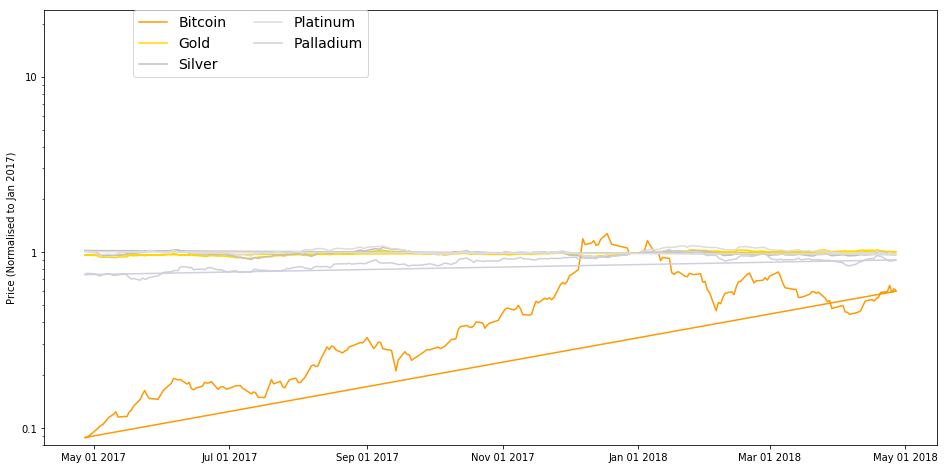

In [15]:
import datetime
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np

metals_df = get_metal_prices().dropna().merge(
 extract_coinmarketcap('bitcoin')[['date', 'close']], on='date', how='inner')

for col in metals_df.columns:
    if col != 'date':
        metals_df[col] = metals_df[col]/metals_df[col][-1:].values

fig, ax1 = plt.subplots(1, 1, figsize=(16, 8))

ax1.set_xticks([datetime.date(j,i,1) for i in range(1,13,2) for j in range(2017, 2019)])
ax1.set_xticklabels([datetime.date(j,i,1).strftime('%b %d %Y') 
                     for i in range(1,13,2) for j in range(2017, 2019)])
for col, col_label, color in zip(['close', 'gold_pm', 'silver', 'platinum_pm', 'palladium_pm'],
                          ['Bitcoin', 'Gold', 'Silver', 'Platinum', 'Palladium'],
                          ['#FF9900', '#FFD700', '#C0C0C0', '#dedcda', '#CED0DD']):
    ax1.plot(metals_df['date'].astype(datetime.datetime), 
             metals_df[col], label=col_label, color=color)
ax1.set_yscale('log')
ax1.set_ylim([0.08, 24])
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., ncol=2, prop={'size': 14})
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: (
            '{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
ax1.set_ylabel('Price (Normalised to Jan 2017)')
plt.show()



Looks like gold slowly and consistently appreciated over 2017 and 2018, thus representing a stable store of wealth. As before, we can plot a price correlation matrix.

In [19]:
def get_stock_prices(market, market_name=None):

        """Retrieve the historical price (or value) of a publically listed stock or index

        

        Parameters

        ----------

        market : the code of the stock or index (see yahoo finance for examples)

            ('%5EDJI' refers to the Dow Jones and '%5EIXIC' pulls the Nasdaq index)

        market_name : specify an appropriate market name or label (under the market_name column)

            the default is None (default is None i.e. the column is not included)

            

        Returns

        -------

        pandas Dataframe

        

        Notes

        -----

        This method scrapes data from yahoo finance, so it only works when the historical

        data is presented on the site (which is not the case for a large number of stocks/indices).

        """

        from_date = int(time.mktime(time.strptime("2017-04-27", "%Y-%m-%d")))
        #print(from_date)

        # we want the daily data

        # this site works off unix time (86400 seconds = 1 day)

        to_date = int(time.mktime(time.strptime("2018-04-27", "%Y-%m-%d"))) + 86400
        
        url = "https://finance.yahoo.com/quote/{}/history?period1={}&period2={}&interval=1d&filter=history&frequency=1d".format(

        market, from_date,  to_date)
        
        #print(url)

        try: 

            parsed_page = urlopen(url, timeout=1).read()
            
            parsed_page = parsed_page.decode("utf8")

        except Exception as e:

            return pd.DataFrame({"error":e}, index=[0])

        start_segment = parsed_page.find('{\"prices\":')

        if start_segment != -1:

            start_list = parsed_page.find("[", start_segment)

            end_list = parsed_page.find("]", start_list)

            parsed_page = parsed_page[start_list:end_list+1]

        else:

            return pd.DataFrame({"error":"Could not find the appropriate text tag"}, index=[0])

        output = json.loads(parsed_page)

        output = pd.DataFrame(output)

        output['date'] = pd.to_datetime(output['date'],unit='s').apply(lambda x: x.date())

        output['date'] = pd.to_datetime(output['date'])

        if market_name is not None:

            output['market_name'] = market_name

     
        return output

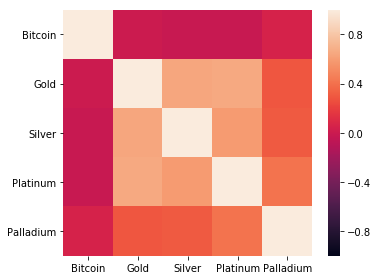

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import time

# remove non-trading days from correlation analysis
corr = get_stock_prices('%5EDJI').dropna()[['date']].merge(
    metals_df, on = 'date', how='inner')[[
        'close', 'gold_pm', 'silver', 'platinum_pm', 'palladium_pm']].pct_change().corr(method='pearson')
plt.figure(figsize=(5.4, 4))
sns.heatmap(corr, xticklabels=['Bitcoin', 'Gold', 'Silver', 'Platinum', 'Palladium'], 
                 yticklabels=['Bitcoin', 'Gold', 'Silver', 'Platinum', 'Palladium'],
           vmin=-1, vmax=1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [22]:
corr

,close,gold_pm,silver,platinum_pm,palladium_pm
close,1.000000,0.004002,-0.017852,-0.017921,0.061842
gold_pm,0.004002,1.000000,0.648401,0.658847,0.295983
silver,-0.017852,0.648401,1.000000,0.586281,0.305744
platinum_pm,-0.017921,0.658847,0.586281,1.000000,0.411174
palladium_pm,0.061842,0.295983,0.305744,0.411174,1.000000


The correlation above shows that the various precious metals are significantly correlated.Bitcoin value appears completely unconnected. 